# 100 pandas puzzles

Inspired by [100 Numpy exerises](https://github.com/rougier/numpy-100), here are 100* short puzzles for testing your knowledge of [pandas'](http://pandas.pydata.org/) power.

Since pandas is a large library with many different specialist features and functions, these excercises focus mainly on the fundamentals of manipulating data (indexing, grouping, aggregating, cleaning), making use of the core DataFrame and Series objects. 

Many of the excerises here are stright-forward in that the solutions require no more than a few lines of code (in pandas or NumPy... don't go using pure Python or Cython!). Choosing the right methods and following best practices is the underlying goal.

The exercises are loosely divided in sections. Each section has a difficulty rating; these ratings are subjective, of course, but should be a seen as a rough guide as to how inventive the required solution is.

If you're just starting out with pandas and you are looking for some other resources, the official documentation  is very extensive. In particular, some good places get a broader overview of pandas are...

- [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [pandas basics](http://pandas.pydata.org/pandas-docs/stable/basics.html)
- [tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [cookbook and idioms](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

Enjoy the puzzles!

\* *the list of exercises is not yet complete! Pull requests or suggestions for additional exercises, corrections and improvements are welcomed.*

## Importing pandas

### Getting started and checking your pandas setup

Difficulty: *easy* 

**1.** Import pandas under the alias `pd`.

In [75]:
import pandas as pd

**2.** Print the version of pandas that has been imported.

In [76]:
pd.__version__

'2.2.3'

**3.** Print out all the *version* information of the libraries that are required by the pandas library.

In [77]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit                : 0691c5cf90477d3503834d983f69350f250a6ff7
python                : 3.13.0
python-bits           : 64
OS                    : Windows
OS-release            : 11
Version               : 10.0.26100
machine               : AMD64
processor             : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
byteorder             : little
LC_ALL                : None
LANG                  : None
LOCALE                : Russian_Ukraine.1252

pandas                : 2.2.3
numpy                 : 2.1.3
pytz                  : 2024.2
dateutil              : 2.9.0.post0
pip                   : 25.0.1
Cython                : None
sphinx                : None
IPython               : 8.30.0
adbc-driver-postgresql: None
adbc-driver-sqlite    : None
bs4                   : None
blosc                 : None
bottleneck            : None
dataframe-api-compat  : None
fastparquet           : None
fsspec                : None
html5lib              : 

## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [78]:
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data = data, index=labels)

**5.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**6.** Return the first 3 rows of the DataFrame `df`.

In [80]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [81]:
df[["animal", "age"]]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [82]:
df[["animal","age"]].iloc[[3,4,8]]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**9.** Select only the rows where the number of visits is greater than 3.

In [83]:
df.loc[df["visits"] > 3]

,animal,age,visits,priority


**10.** Select the rows where the age is missing, i.e. it is `NaN`.

In [84]:
df[df.age.isna()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [85]:
df[(df["animal"] == "cat")&(df["age"] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**12.** Select the rows the age is between 2 and 4 (inclusive).

In [86]:
df[df["age"].between(2,4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**13.** Change the age in row 'f' to 1.5.

In [87]:
df.loc["f" , "age"] = 1.5

**14.** Calculate the sum of all visits in `df` (i.e. find the total number of visits).

In [88]:
df["visits"].sum()

np.int64(19)

**15.** Calculate the mean age for each different animal in `df`.

In [89]:
df.groupby("animal")["age"].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [90]:
df.loc["k"] = ["Nashorn", 15, 2, "yes"]
df.drop("k", inplace=True)



**17.** Count the number of each type of animal in `df`.

In [91]:
df["animal"].value_counts()

animal
cat      4
dog      4
snake    2
Name: count, dtype: int64

**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [92]:
df.sort_values(by = ["age","visits"], ascending=[False, True])


,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [93]:
df = df.replace({"yes": True, "no": False})
#df["priority"] = df["priority"].map({"yes": True, "no": False})
df

C:\Users\xmich\AppData\Local\Temp\ipykernel_760\2102349172.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"yes": True, "no": False})


,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [94]:
df["animal"] = df["animal"].replace({"snake": "python"})

**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (*hint: use a pivot table*).

In [95]:
df.pivot_table(values = "age", index= "animal", columns= "visits", aggfunc={"age": "mean"})

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

In [96]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df[df["A"].ne(df["A"].shift())]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [97]:
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
df["mean"] = df.mean(axis=1)
df.sub(df.mean(axis=1),axis = 0)

,0,1,2,mean
0,0.315054,-0.241028,-0.074026,0.0
1,0.033691,-0.295932,0.262241,0.0
2,-0.283983,0.243480,0.040503,0.0
3,-0.403297,0.382247,0.021051,0.0
4,-0.020593,-0.359112,0.379705,0.0


**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum?  Return that column's label.

In [98]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
#df.loc["sum"] = df.sum()
df.sum().idxmin()

'f'

**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)? As input, use a DataFrame of zeros and ones with 10 rows and 3 columns.

```python
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
```

In [99]:
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
len(df.drop_duplicates())
#df = df.drop_duplicates().reset_index(drop=True)
#df.index[-1]


4

The next three puzzles are slightly harder.


**26.** In the cell below, you have a DataFrame `df` that consists of 10 columns of floating-point numbers. Exactly 5 entries in each row are NaN values. 

For each row of the DataFrame, find the *column* which contains the *third* NaN value.

You should return a Series of column labels: `e, c, d, h, d`

In [100]:
nan = np.nan

data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]

columns = list('abcdefghij')

df = pd.DataFrame(data, columns=columns)

# write a solution to the question here
df["result"] = (df.isnull().cumsum(axis=1)==3).idxmax(axis=1)
df


        

,a,b,c,d,e,f,g,h,i,j,result
0,0.04,NaN,NaN,0.25,NaN,0.43,0.71,0.51,NaN,NaN,e
1,NaN,NaN,NaN,0.04,0.76,NaN,NaN,0.67,0.76,0.16,c
2,NaN,NaN,0.50,NaN,0.31,0.40,NaN,NaN,0.24,0.01,d
3,0.49,NaN,NaN,0.62,0.73,0.26,0.85,NaN,NaN,NaN,h
4,NaN,NaN,0.41,NaN,0.05,NaN,0.61,NaN,0.48,0.68,d


**27.** A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values. You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [101]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
# write a solution to the question here
"""
df = df.sort_values(by=["grps", "vals"], ascending=[True, False])
df["count"] = df.groupby("grps")["vals"].cumcount() + 1
df = df.pivot_table(index="count", columns="grps", values="vals")
df.cumsum().loc[3]
"""
df.groupby("grps")["vals"].apply(lambda x: x.nlargest(3).sum())



grps
a    409
b    156
c    345
Name: vals, dtype: int64

**28.** The DataFrame `df` constructed below has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). 

For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

The answer should be a Series as follows:

```
A
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
```

In [102]:
df = pd.DataFrame(np.random.RandomState(8765).randint(1, 101, size=(100, 2)), columns = ["A", "B"])
# I am trying to understand the assignment so I just take values 10 consecurive "A" as indexes for "B"
#df.iloc[46] + df.iloc[75] + df.iloc[49] + df.iloc[33] + df.iloc[71] + df.iloc[8] + df.iloc[24] + df.iloc[40] + df.iloc[24] + df.iloc[63] # =675
# OK I eventuallt find what is the assignment. They want me to sum the values of "B" when the values of "A" are 10 consecutive
#40+83+13+59+54+72+86+71+18+43+96 = 635
# write a solution to the question here -> Adding VS Code source control
"""
bins = range(0, 101, 10)
labels = [f"{i}-{i+10}" for i in bins]
df["A_bins"] = pd.cut(df["A"], bins=bins, labels=labels, right=True)
df.groupby("A_bins")["B"].sum()
"""

df.groupby(pd.cut(df["A"], np.arange(0, 101, 10)))["B"].sum()

C:\Users\xmich\AppData\Local\Temp\ipykernel_760\1433301843.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df["A"], np.arange(0, 101, 10)))["B"].sum()


A
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
Name: B, dtype: int32

## DataFrames: harder problems 

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

**29.** Consider a DataFrame `df` where there is an integer column 'X':
```python
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
```
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be 

```
[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]
```

Make this a new column 'Y'.

In [103]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
#df["Y"] = (df["X"] > 0).cumsum() * (df["X"] > 0) # don`t start a new group with 0
group = (df["X"] == 0).cumsum()
df["Y"] = (df["X"] > 0).groupby(group).cumsum()
df



,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


**30.** Consider the DataFrame constructed below which contains rows and columns of numerical data. 

Create a list of the column-row index locations of the 3 largest values in this DataFrame. In this case, the answer should be:
```
[(5, 7), (6, 4), (2, 5)]
```

In [104]:
df = pd.DataFrame(np.random.RandomState(30).randint(1, 101, size=(8, 8)))
df.max().nlargest(3).index.tolist()  # Get the column names of the top 3 max values
#df.loc[df["2"]] # Get the rows corresponding to those columns
#df.iloc[:, df.max().nlargest(3).index] # still trying
"""
a = df.max(axis=0).nlargest(3).index # Get the max values of each column
b = df.max(axis=1).nlargest(3).index
result = list(zip(a, b))
"""
a = df.stack().nlargest(3).index.reorder_levels([1,0])  # Get the top 3 max values indexies and changed row-column index to a column-row index so it is asked in a task
a.tolist()  
#df.unstack().nlargest(3).index.tolist() # That`s another way to do it, that is shown in solutionss


[(2, 5), (6, 4), (5, 7)]

**31.** You are given the DataFrame below with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals'.

```python
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), 
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
```

Create a new column 'patched_values' which contains the same values as the 'vals' any negative values in 'vals' with the group mean:

```
    vals grps  patched_vals
0    -12    A          13.6
1     -7    B          28.0
2    -14    A          13.6
3      4    A           4.0
4     -7    A          13.6
5     28    B          28.0
6     -2    A          13.6
7     -1    A          13.6
8      8    A           8.0
9     -2    B          28.0
10    28    A          28.0
11    12    A          12.0
12    16    A          16.0
13   -24    A          13.6
14   -12    A          13.6
```

In [105]:
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), 
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
"""# Keith solution seems good
We use mine mean_A and mean_B
df["patched_vals"] = np.where(df.grps == "A", mean_A, mean_B)
df["patched_vald"] = np.where(df.vals < 0, df["patched_vals"], df["vals"]) 
"""
# Get the mean value of group A where vals are positive
mean_A = df[df["vals"] > 0].groupby("grps")["vals"].mean().loc["A"]  
# Get the mean value of group B where vals are positive
mean_B = df[df["vals"] > 0].groupby("grps")["vals"].mean().loc["B"]
# Replace negative values of group A with mean of group A and for group B with mean of group B
df["patched_vals"] = df.apply(lambda x: mean_A if x["grps"] == "A" and x["vals"] < 0 else (mean_B if x["grps"] == "B" and x["vals"] < 0 else x["vals"]), axis=1)
df

,vals,grps,patched_vals
0,-12,A,13.6
1,-7,B,28.0
2,-14,A,13.6
3,4,A,4.0
4,-7,A,13.6
5,28,B,28.0
6,-2,A,13.6
7,-1,A,13.6
8,8,A,8.0
9,-2,B,28.0


**32.** Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

In [106]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
# where the value is True we want to use the rolling mean of the last 3 values, otherwise we want to shift the previous value by 1
"""
df["Y"] = np.where(df["value"].isna(), df["value"].rolling(3).mean(), )  # still working on this part
"""
# The solution is taken from answers
g1 = df.groupby(['group'])['value']              # group values  
g2 = df.fillna(0).groupby(['group'])['value']    # fillna, then group values

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count() # compute means

s.reset_index(level=0, drop=True).sort_index()  # drop/sort index
s

group    
a      0     1.000000
       1     1.500000
       4     1.666667
       8     3.666667
       10    4.500000
b      2     3.000000
       3     3.000000
       5     3.000000
       6     3.000000
       7     2.000000
       9     2.000000
       11    4.000000
Name: value, dtype: float64

## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


**33.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [107]:
dti = pd.date_range(start='2015-01-01', end="2015-12-31", freq='B')
s = pd.Series(np.random.randint(100,size = len(dti)), index=dti)  # Create a Series with random values and business days as index
s

2015-01-01    57
2015-01-02    80
2015-01-05    20
2015-01-06    57
2015-01-07    53
              ..
2015-12-25    44
2015-12-28    28
2015-12-29    33
2015-12-30    49
2015-12-31    38
Freq: B, Length: 261, dtype: int32

**34.** Find the sum of the values in `s` for every Wednesday.

In [108]:
sum_wednesdays = s[s.index.weekday == 2].sum()  # Sum the values of the series where the index is a Wednesday (weekday == 2)
sum_wednesdays

np.int64(2843)

**35.** For each calendar month in `s`, find the mean of values.

In [109]:
s.groupby(s.index.month).mean()
# or also
s.resample('M').mean()  # Resample the series to weekly frequency and calculate the mean for each week

C:\Users\xmich\AppData\Local\Temp\ipykernel_760\890674845.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s.resample('M').mean()  # Resample the series to weekly frequency and calculate the mean for each week


2015-01-31    54.863636
2015-02-28    57.650000
2015-03-31    44.363636
2015-04-30    53.727273
2015-05-31    63.952381
2015-06-30    43.772727
2015-07-31    52.565217
2015-08-31    35.809524
2015-09-30    49.909091
2015-10-31    58.090909
2015-11-30    46.523810
2015-12-31    58.000000
Freq: ME, dtype: float64

**36.** For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [110]:
s.groupby(pd.Grouper(freq="4M")).idxmax()  # Group the series by 4-month intervals and get the index of the maximum value in each group



C:\Users\xmich\AppData\Local\Temp\ipykernel_760\2718332138.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s.groupby(pd.Grouper(freq="4M")).idxmax()  # Group the series by 4-month intervals and get the index of the maximum value in each group


2015-01-31   2015-01-23
2015-05-31   2015-03-24
2015-09-30   2015-07-03
2016-01-31   2015-11-09
Freq: 4ME, dtype: datetime64[ns]

**37.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [111]:
dates = pd.date_range(start='2015-01-01', end="2016-12-31", freq='WOM-3THU')
dates

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```
Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```


(It's some flight data I made up; it's not meant to be accurate in any way.)


**38.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [112]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
# filling Nan values in 'FlightNumber' with the previous value + 10
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)  # Interpolating NaN values
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


**39.** The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame called 'temp' with the correct values. Assign the correct column names 'From' and 'To' to this temporary DataFrame. 

In [113]:
temp = df["From_To"].str.split("_", expand=True)  # Splitting 'From_To' column into two separate columns
temp.columns = ["From", "To"]  # Renaming the column
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


**40.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame 'temp'. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [114]:

temp["From"] = temp["From"].str.capitalize()
temp["To"] = temp["To"].str.capitalize() 
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


**41.** Delete the **From_To** column from `df` and attach the temporary DataFrame 'temp' from the previous questions.

In [115]:
df = df.drop(columns=["From_To"])  # Dropping the original 'From_To' column
df = df.join(temp)  # Joining the new columns back to the original DataFrame
df


,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


**42**. In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [116]:
df["Airline"] = df["Airline"].str.replace(r"[^A-Za-z\s]", "", regex=True) # Removing special characters from 'Airline' column
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


**43**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

The DataFrame should look much better now.
```
   FlightNumber          Airline      From         To  delay_1  delay_2  delay_3
0         10045              KLM    London      Paris     23.0     47.0      NaN
1         10055       Air France    Madrid      Milan      NaN      NaN      NaN
2         10065  British Airways    London  Stockholm     24.0     43.0     87.0
3         10075       Air France  Budapest      Paris     13.0      NaN      NaN
4         10085        Swiss Air  Brussels     London     67.0     32.0      NaN
```

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels. 

**44**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [117]:
letters = ["A","B","C"]
numbers = list(range(10))

MultiIndex = pd.MultiIndex.from_product([letters, numbers], names=["letter", "number"])  # Creating a MultiIndex from the product of letters and numbers
value = np.random.randint(100,size = len(MultiIndex)) 

s = pd.Series(value, index = MultiIndex)
s

letter  number
A       0         63
        1         78
        2         31
        3         84
        4         28
        5         26
        6          1
        7         74
        8         41
        9         71
B       0         12
        1         70
        2         31
        3         75
        4         12
        5         64
        6         61
        7          2
        8         29
        9         73
C       0          6
        1         46
        2          5
        3         24
        4         33
        5         40
        6         91
        7         28
        8         93
        9         81
dtype: int32

**45.** Check the index of `s` is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [118]:
s.index.is_monotonic_increasing  # is_lexsorted is not available in pandas, but we can check if the index is sorted in increasing order



True

**46**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [119]:
s.loc[:,[1,3,6]]

letter  number
A       1         78
        3         84
        6          1
B       1         70
        3         75
        6         61
C       1         46
        3         24
        6         91
dtype: int32

**47**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [120]:
s.loc[:"B",5:]

letter  number
A       5         26
        6          1
        7         74
        8         41
        9         71
B       5         64
        6         61
        7          2
        8         29
        9         73
dtype: int32

**48**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [121]:
#s.groupby("letter").sum() #
s.groupby(level = 0).sum() # the answer from solutions


letter
A    497
B    429
C    447
dtype: int32

**49**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

In [122]:
#s.groupby("number").sum()
s.unstack().sum()  # Unstacking the series and summing along the columns

number
0     81
1    194
2     67
3    183
4     73
5    130
6    153
7    104
8    163
9    225
dtype: int64

**50**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [123]:
#s.unstack().unstack() # it works but not the same as answer
s.swaplevel()


number  letter
0       A         63
1       A         78
2       A         31
3       A         84
4       A         28
5       A         26
6       A          1
7       A         74
8       A         41
9       A         71
0       B         12
1       B         70
2       B         31
3       B         75
4       B         12
5       B         64
6       B         61
7       B          2
8       B         29
9       B         73
0       C          6
1       C         46
2       C          5
3       C         24
4       C         33
5       C         40
6       C         91
7       C         28
8       C         93
9       C         81
dtype: int32

## Minesweeper

### Generate the numbers for safe squares in a Minesweeper grid

Difficulty: *medium* to *hard*

If you've ever used an older version of Windows, there's a good chance you've played with Minesweeper:
- https://en.wikipedia.org/wiki/Minesweeper_(video_game)


If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.

In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

**51**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

In [124]:
x = np.arange(4)
y = np.arange(5)
MultiIndex = pd.MultiIndex.from_product([x, y], names=["x", "y"])
df = pd.DataFrame(index=MultiIndex)
df
#mines = np.random.choice([0 , 1], size=len(MultiIndex), p=[0.6,0.4])  # Generating random values for the mines

Empty DataFrame
Columns: []
Index: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4)]

**52**. For this DataFrame `df`, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [125]:

mines = np.random.choice([0 , 1], size=len(MultiIndex), p=[0.6,0.4])  # Generating random values for the mines
df["mines"] = mines  # Adding a 'mine' column with random values of 0 or 1
df

mines
x y       
0 0      0
  1      0
  2      1
  3      1
  4      0
1 0      1
  1      1
  2      1
  3      0
  4      0
2 0      0
  1      0
  2      0
  3      0
  4      1
3 0      0
  1      0
  2      1
  3      1
  4      0

**53**. Now create a new column for this DataFrame called `'adjacent'`. This column should contain the number of mines found on adjacent squares in the grid. 

(E.g. for the first row, which is the entry for the coordinate `(0, 0)`, count how many mines are found on the coordinates `(0, 1)`, `(1, 0)` and `(1, 1)`.)

In [126]:
#df["adjacent"] =  
#df.loc[pd.IndexSlice[:1,:1],:]

def adjacent_sum(coord):
    cx, cy = coord
    # this if condition checks if the current cell is a mine. I add it from a next task
    if df.loc[(cx, cy), "mines"] == 1:
        return np.nan
    neighbors = df.loc[pd.IndexSlice[max(0, cx-1):min(x.max(), cx+1),
                           max(0, cy-1):min(y.max(), cy+1)], "mines"]
    return neighbors.sum()

df["adjacent"] = df.index.map(adjacent_sum)  # Applying the function to each index in the DataFrame df["adjacent"] = [adjacent_sum(idx) for idx in df.index]
df.unstack()

mines             adjacent                    
y     0  1  2  3  4        0    1    2    3    4
x                                               
0     0  0  1  1  0      2.0  4.0  NaN  NaN  1.0
1     1  1  1  0  0      NaN  NaN  NaN  4.0  2.0
2     0  0  0  0  1      2.0  4.0  4.0  4.0  NaN
3     0  0  1  1  0      0.0  1.0  NaN  NaN  2.0

**54**. For rows of the DataFrame that contain a mine, set the value in the `'adjacent'` column to NaN.

In [127]:
#I also add it in the function before, but I made it here too so like another solution
df.loc[df.mines == 1, "adjacent"] = np.nan  # Setting the 'adjacent' value to NaN where there is a mine
df

mines  adjacent
x y                 
0 0      0       2.0
  1      0       4.0
  2      1       NaN
  3      1       NaN
  4      0       1.0
1 0      1       NaN
  1      1       NaN
  2      1       NaN
  3      0       4.0
  4      0       2.0
2 0      0       2.0
  1      0       4.0
  2      0       4.0
  3      0       4.0
  4      1       NaN
3 0      0       0.0
  1      0       1.0
  2      1       NaN
  3      1       NaN
  4      0       2.0

**55**. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the `x` coordinate, rows are the `y` coordinate.

In [128]:
df["adjacent"].unstack()

y,0,1,2,3,4
x,,,,,
0,2.0,4.0,NaN,NaN,1.0
1,NaN,NaN,NaN,4.0,2.0
2,2.0,4.0,4.0,4.0,NaN
3,0.0,1.0,NaN,NaN,2.0


## Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**56.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers. 

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

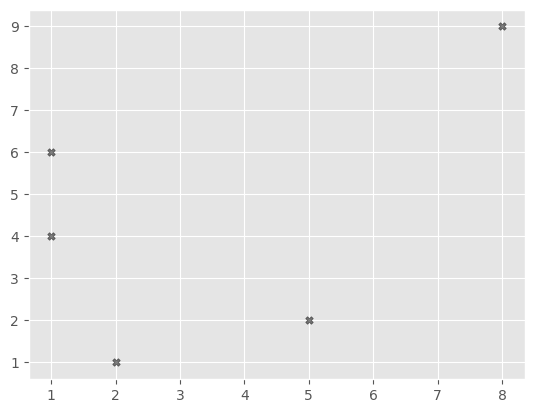

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

df = pd.DataFrame({"xs": [1,5,2,8,1], "ys": [4,2,1,9,6]})

plt.scatter(df["xs"], df["ys"], s = 30, marker = "X", c="black", alpha=0.5)


**57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

<Axes: xlabel='hours_in', ylabel='productivity'>

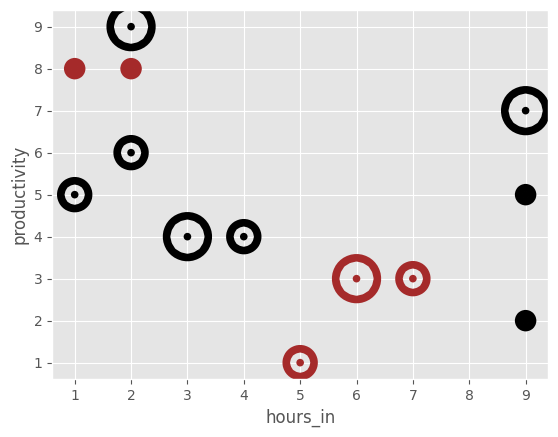

In [130]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

caffienated = np.where(df["caffienated"] == 1, "brown", "black")  # if we have caffienated, we set the color to brown, otherwise black
df.plot.scatter(x = "hours_in", y = "productivity", linewidths=10*df["happiness"], c = caffienated, s = 30) # linewidths show the level of happiness


**58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

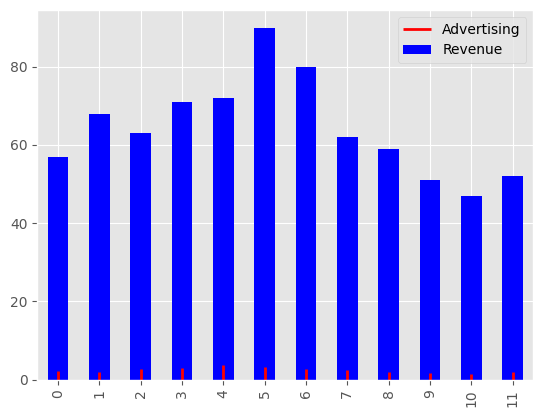

In [131]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
#df["advertising"].plot.bar(color = "red", alpha=1, label="Advertising", width=0.1)
df["revenue"].plot.bar(label = "Revenue", alpha=1 ,color = "blue")
plt.vlines(df["month"], df["advertising"], 0, label = "Advertising", color="red", alpha=1, linewidth=2)
plt.legend()
plt.show()


Now we're finally ready to create a candlestick chart, which is a very common tool used to analyze stock price data.  A candlestick chart shows the opening, closing, highest, and lowest price for a stock during a time window.  The color of the "candle" (the thick part of the bar) is green if the stock closed above its opening price, or red if below.

![Candlestick Example](img/candle.jpg)

This was initially designed to be a pandas plotting challenge, but it just so happens that this type of plot is just not feasible using pandas' methods.  If you are unfamiliar with matplotlib, we have provided a function that will plot the chart for you so long as you can use pandas to get the data into the correct format.

Your first step should be to get the data in the correct format using pandas' time-series grouping function.  We would like each candle to represent an hour's worth of data.  You can write your own aggregation function which returns the open/high/low/close, but pandas has a built-in which also does this.

The below cell contains helper functions.  Call ```day_stock_data()``` to generate a DataFrame containing the prices a hypothetical stock sold for, and the time the sale occurred.  Call ```plot_candlestick(df)``` on your properly aggregated and formatted stock data to print the candlestick chart.


import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

"""
#Don't read me unless you get stuck!
def plot_candlestick(agg):

#agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]

    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()
"""




C:\Users\xmich\AppData\Local\Temp\ipykernel_760\2052164537.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.time = pd.to_datetime(df.time)


,first,last,height
time,,,
9,100.000000,99.529950,-0.470050
10,99.441533,100.844677,1.403144
11,100.771402,96.627350,-4.144052
12,96.687022,95.757949,-0.929073
13,95.713102,98.300120,2.587018
14,98.210955,95.288864,-2.922091
15,95.278333,97.997420,2.719087


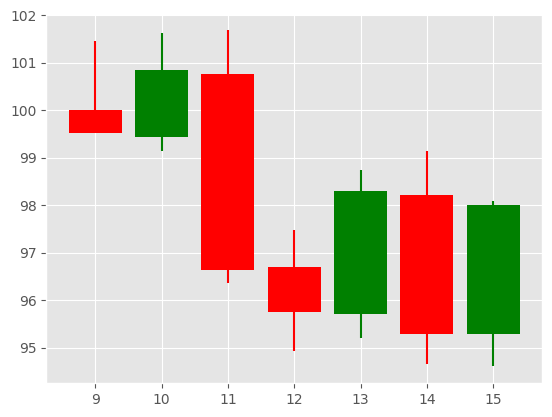

In [192]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df
df = day_stock_data()

#df["hour"] = df["time"].dt.hour
#hourly_FL = df.groupby(df["time"].dt.hour)["price"].agg(["first","last"])
hourly_MM = df.groupby(df["time"].dt.hour)["price"].agg(["min","max"])
hourly_FL = df.groupby(df["time"].dt.hour)["price"].agg(
    first="first",
    last="last",
    height=lambda x: x.iloc[-1] - x.iloc[0]  # last - first
)
colors = np.where(hourly_FL["height"]>= 0, "green", "red")  # Determine the color based on the height
plt.vlines(hourly_MM.index,hourly_MM["min"],hourly_MM["max"],color = colors)
plt.bar(hourly_FL.index, hourly_FL["height"], bottom = hourly_FL["first"],color = colors)
hourly_FL



**59.** Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

**60.** Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart.  Use the ```plot_candlestick(df)``` function above, or matplotlib's [```plot``` documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) if you get stuck.

*More exercises to follow soon...*